In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf, suppress=True)

/tmp/ipykernel_166452/4016424070.py:99: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


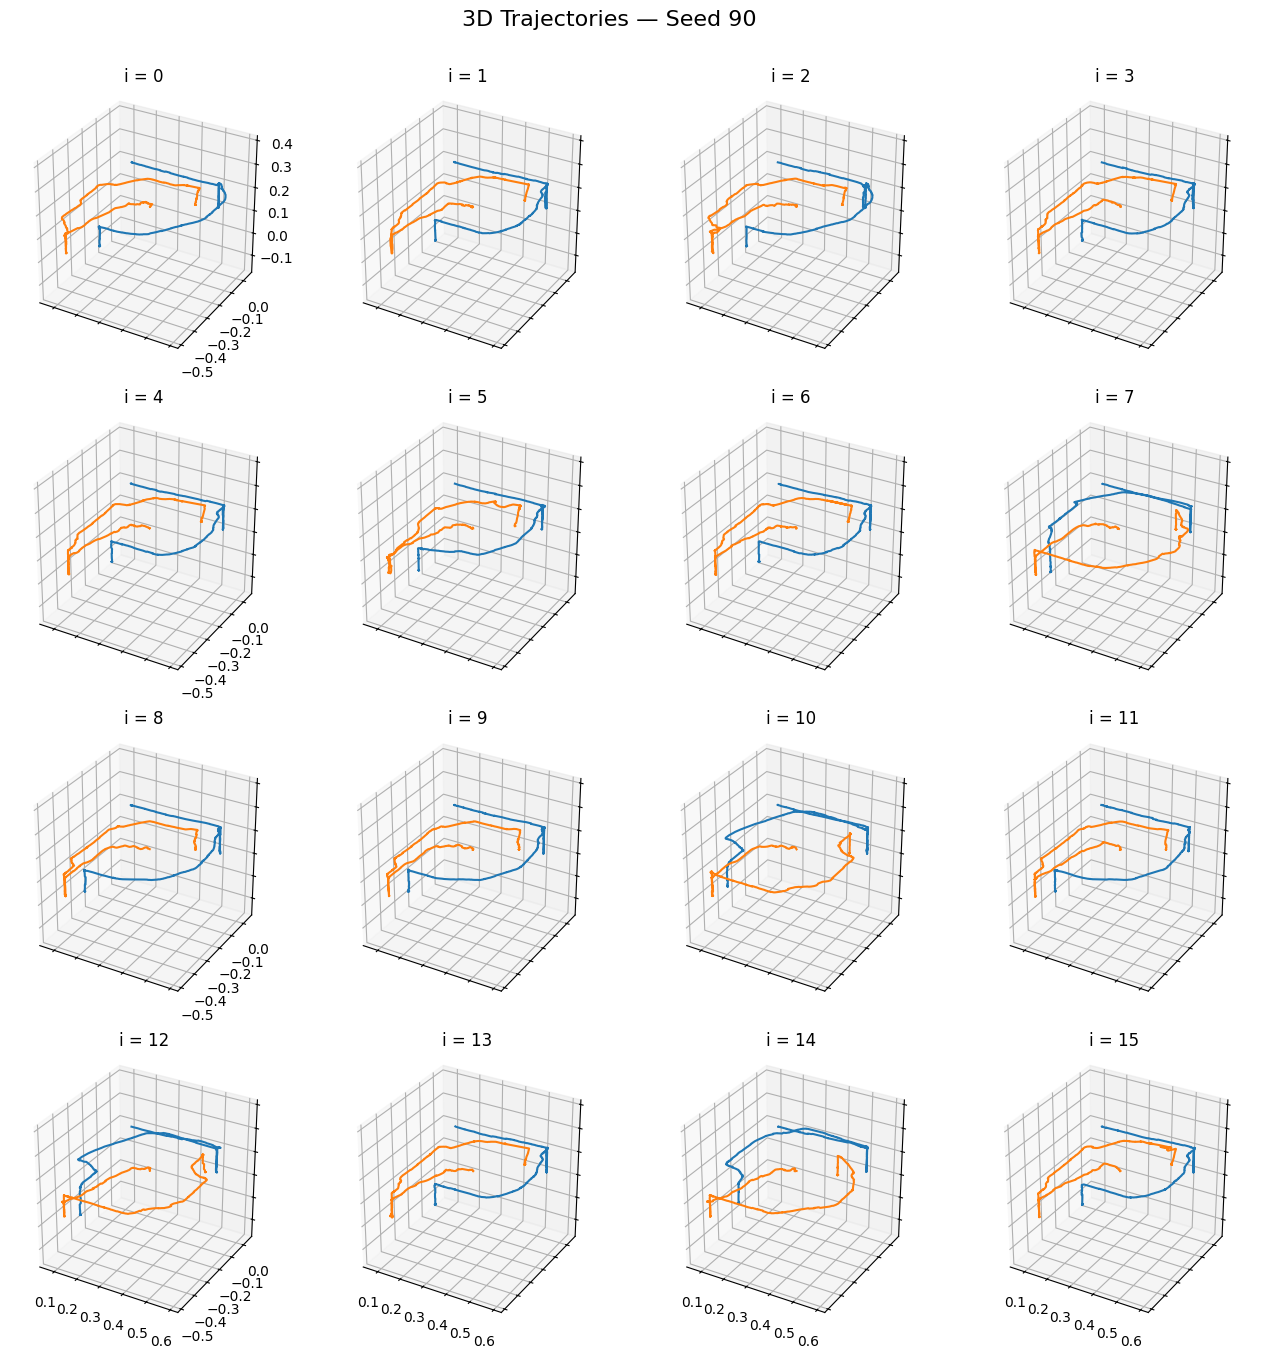

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 - needed for 3D projection

# --------- config ----------
seed = 90
base_dir = "samples/testseed"
name_fmt = "planned_traj{arm}_seed{seed}_{i}_new.npy"  # {arm} is 1 or 2
idx_range = range(16)  # 0..15
# ---------------------------

def load_pair(seed, i):
    f1 = os.path.join(base_dir, name_fmt.format(arm=1, seed=seed, i=i))
    f2 = os.path.join(base_dir, name_fmt.format(arm=2, seed=seed, i=i))
    a1 = np.load(f1, allow_pickle=True)
    a2 = np.load(f2, allow_pickle=True)
    return a1, a2

# Preload all available pairs and remember which indices exist
pairs = []
available_idx = []
for i in idx_range:
    try:
        a1, a2 = load_pair(seed, i)
        pairs.append((a1, a2))
        available_idx.append(i)
    except FileNotFoundError:
        # Skip missing ones gracefully
        pass

if not pairs:
    raise RuntimeError("No trajectory files found. Double-check base_dir/filenames.")

# Compute global bounds so all subplots share the same cubic limits (nice & consistent)
all_pts = []
for a1, a2 in pairs:
    all_pts.append(a1[:, :3])
    all_pts.append(a2[:, :3])
all_pts = np.vstack(all_pts)

xmin, ymin, zmin = all_pts.min(axis=0)
xmax, ymax, zmax = all_pts.max(axis=0)

# make cubic bounds
cx, cy, cz = (xmin + xmax) / 2, (ymin + ymax) / 2, (zmin + zmax) / 2
half = max(xmax - xmin, ymax - ymin, zmax - zmin) / 2
margin = 0.05 * half
half = half + margin
xlim = (cx - half, cx + half)
ylim = (cy - half, cy + half)
zlim = (cz - half, cz + half)

# Create a 4x4 grid (or smaller if fewer than 16 available)
n = len(pairs)
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 16), subplot_kw={'projection': '3d'})
axes = axes.ravel()

for k in range(rows * cols):
    ax = axes[k]
    if k < n:
        a1, a2 = pairs[k]
        i = available_idx[k]
        # Split into coordinates
        x1, y1, z1 = a1[:, 0], a1[:, 1], a1[:, 2]
        x2, y2, z2 = a2[:, 0], a2[:, 1], a2[:, 2]

        # plot both arms
        ax.plot(x1, y1, z1)  # default colors keep it uncluttered
        ax.plot(x2, y2, z2)

        # set nice consistent limits/aspect
        ax.set_xlim(*xlim); ax.set_ylim(*ylim); ax.set_zlim(*zlim)
        try:
            ax.set_box_aspect((1, 1, 1))  # mpl >= 3.3
        except Exception:
            pass

        ax.set_title(f"i = {i}", pad=6)
        # Keep labels light to avoid clutter; show on left/bottom panels only
        if k % cols != 0:
            ax.set_ylabel("")
            ax.set_yticklabels([])
        if k // cols != rows - 1:
            ax.set_xlabel("")
            ax.set_xticklabels([])
        # z labels are often noisy; hide most except first subplot
        if k != 0:
            ax.set_zlabel("")
            ax.set_zticklabels([])
    else:
        # Hide extra axes if fewer than 16
        ax.set_visible(False)

# Shared labels (optional)
fig.suptitle(f"3D Trajectories — Seed {seed}", y=0.93, fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:

i = 9
sampled1 = np.load("samples/testseed/planned_traj1_seed%s_%s_new.npy" % (seed, i), allow_pickle=True)
sampled2 = np.load("samples/testseed/planned_traj2_seed%s_%s_new.npy" % (seed, i), allow_pickle=True)

In [3]:
np.shape(sampled1)

(1100, 10)

In [4]:
print(sampled1[0, 9])
# print(sampled2[0, :])

0.009781747520548112


In [5]:
sampled1

array([[ 0.12644582,  0.00221522,  0.20739767, -0.00567051,  0.99904035,
         0.0017207 ,  0.99722519,  0.00626752,  0.062646  ,  0.00978175],
       [ 0.12596175,  0.00208206,  0.20738464, -0.00536413,  0.99916455,
         0.00172814,  0.99737153,  0.0060221 ,  0.06263735,  0.01071424],
       [ 0.12665984,  0.00199636,  0.20735354, -0.00611336,  0.9993464 ,
         0.00170117,  0.99737539,  0.00595387,  0.06256509,  0.01055687],
       [ 0.12794124,  0.00200201,  0.20735548, -0.00592487,  0.99918329,
         0.00170247,  0.99712366,  0.00618694,  0.0623634 ,  0.0100682 ],
       [ 0.12807452,  0.00198035,  0.20734357, -0.00555038,  0.99905812,
         0.00165943,  0.99724958,  0.00666705,  0.06248927,  0.00999821],
       [ 0.12913675,  0.00179231,  0.20733633, -0.00514739,  0.99875202,
         0.00167443,  0.99722199,  0.00648945,  0.06223721,  0.00946554],
       [ 0.13132884,  0.00191114,  0.20739073, -0.00521694,  0.99936012,
         0.00167954,  0.99743484,  0.00622463

In [6]:
mean = np.load('data/mean_1000.npy')
sampled1

array([[ 0.12644582,  0.00221522,  0.20739767, -0.00567051,  0.99904035,
         0.0017207 ,  0.99722519,  0.00626752,  0.062646  ,  0.00978175],
       [ 0.12596175,  0.00208206,  0.20738464, -0.00536413,  0.99916455,
         0.00172814,  0.99737153,  0.0060221 ,  0.06263735,  0.01071424],
       [ 0.12665984,  0.00199636,  0.20735354, -0.00611336,  0.9993464 ,
         0.00170117,  0.99737539,  0.00595387,  0.06256509,  0.01055687],
       [ 0.12794124,  0.00200201,  0.20735548, -0.00592487,  0.99918329,
         0.00170247,  0.99712366,  0.00618694,  0.0623634 ,  0.0100682 ],
       [ 0.12807452,  0.00198035,  0.20734357, -0.00555038,  0.99905812,
         0.00165943,  0.99724958,  0.00666705,  0.06248927,  0.00999821],
       [ 0.12913675,  0.00179231,  0.20733633, -0.00514739,  0.99875202,
         0.00167443,  0.99722199,  0.00648945,  0.06223721,  0.00946554],
       [ 0.13132884,  0.00191114,  0.20739073, -0.00521694,  0.99936012,
         0.00167954,  0.99743484,  0.00622463

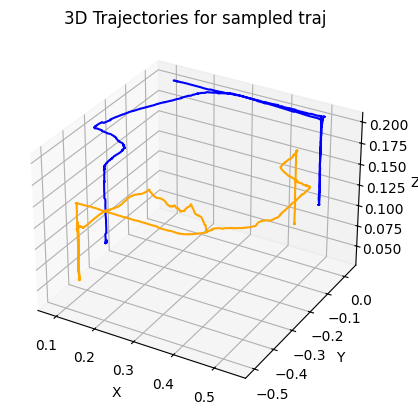

In [26]:
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectories(arr1: np.ndarray, arr2:np.ndarray):
    x1, y1, z1 = arr1[:, 0], arr1[:, 1], arr1[:, 2]
    x2, y2, z2 = arr2[:, 0], arr2[:, 1], arr2[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x1, y1, z1, color="blue")
    ax.plot(x2, y2, z2, color="orange")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D Trajectories for sampled traj')
    plt.show()

plot_trajectories(sampled1, sampled2)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Adjust the animation speed and smoothness
# A larger step will make the animation faster but less detailed.
frame_step = 1
# Frames per second for the output GIF
animation_fps = 15

# --- 2. Select the Trajectories ---
# Select the data for the two trajectories based on the index
# traj1_data = expert_states[trajectory_index, ::frame_step, :3]
# traj2_data = expert_states[trajectory_index, ::frame_step, 7:10]
traj1_data = sampled1[::frame_step, :3]
traj2_data = sampled2[::frame_step, :3]
num_frames = traj1_data.shape[0]


# --- 3. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize two empty 3D lines
line1, = ax.plot([], [], [], lw=2, label='Trajectory 1 (data[:, :, :3])')
line2, = ax.plot([], [], [], lw=2, label='Trajectory 2 (data[:, :, 7:10])')

# Set plot limits based on the data range to ensure everything is visible
all_data = np.vstack([traj1_data, traj2_data])
ax.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
ax.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
ax.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# ax.set_title(f'Animated 3D Trajectories for Index {trajectory_index}')
ax.legend()
ax.grid(True)


# --- 4. Define the Animation Update Function ---
def update(frame):
    """
    This function is called for each frame of the animation.
    It updates the data for the two lines, making them longer in each frame.
    """
    # Update trajectory 1
    line1.set_data(traj1_data[:frame+1, 0], traj1_data[:frame+1, 1])
    line1.set_3d_properties(traj1_data[:frame+1, 2])

    # Update trajectory 2
    line2.set_data(traj2_data[:frame+1, 0], traj2_data[:frame+1, 1])
    line2.set_3d_properties(traj2_data[:frame+1, 2])

    return line1, line2


# --- 5. Create and Save the Animation ---
# Create the animation object
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    blit=True
)

# Save the animation as a GIF file
output_filename = 'viz/P200E10_1100T_fullstate_nofinalpos_nopot_rotmat_fixkinova_separatenorm_denoise10/sampled0.gif'
print(f"Rendering and saving animation to '{output_filename}'...")
# The 'Pillow' writer is commonly available and good for creating GIFs.
ani.save(output_filename, writer='pillow', fps=animation_fps)
plt.close(fig) # prevent static plot from displaying
print("Animation saved successfully.")


Rendering and saving animation to 'viz/P200E10_1100T_fullstate_nofinalpos_nopot_rotmat_fixkinova_separatenorm_denoise10/sampled0.gif'...
Animation saved successfully.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Adjust the animation speed and smoothness
# A larger step will make the animation faster but less detailed.
frame_step = 1
# Frames per second for the output GIF
animation_fps = 15

# --- 2. Select the Trajectories ---
# Select the data for the two trajectories based on the index
# traj1_data = expert_states[trajectory_index, ::frame_step, :3]
# traj2_data = expert_states[trajectory_index, ::frame_step, 7:10]
idx = 0
expert_data = np.load('data/expert_actions_rotmat_sparse_1000.npy')
traj1_data = expert_data[idx, ::frame_step, :10]
traj2_data = expert_data[idx, ::frame_step, 10:20]
num_frames = traj1_data.shape[0]


# --- 3. Set up the 3D Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize two empty 3D lines
line1, = ax.plot([], [], [], lw=2, label='Trajectory 1 (data[:, :, :3])')
line2, = ax.plot([], [], [], lw=2, label='Trajectory 2 (data[:, :, 7:10])')

# Set plot limits based on the data range to ensure everything is visible
all_data = np.vstack([traj1_data, traj2_data])
ax.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
ax.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
ax.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# ax.set_title(f'Animated 3D Trajectories for Index {trajectory_index}')
ax.legend()
ax.grid(True)


# --- 4. Define the Animation Update Function ---
def update(frame):
    """
    This function is called for each frame of the animation.
    It updates the data for the two lines, making them longer in each frame.
    """
    # Update trajectory 1
    line1.set_data(traj1_data[:frame+1, 0], traj1_data[:frame+1, 1])
    line1.set_3d_properties(traj1_data[:frame+1, 2])

    # Update trajectory 2
    line2.set_data(traj2_data[:frame+1, 0], traj2_data[:frame+1, 1])
    line2.set_3d_properties(traj2_data[:frame+1, 2])

    return line1, line2


# --- 5. Create and Save the Animation ---
# Create the animation object
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    blit=True
)

# Save the animation as a GIF file
output_filename = 'viz/expert/new_expert.gif'
print(f"Rendering and saving animation to '{output_filename}'...")
# The 'Pillow' writer is commonly available and good for creating GIFs.
ani.save(output_filename, writer='pillow', fps=animation_fps)
plt.close(fig) # prevent static plot from displaying
print("Animation saved successfully.")


Rendering and saving animation to 'viz/expert/new_expert.gif'...
Animation saved successfully.
